# Sports dataset

This notebook contains a partial explorative analysis on a [sports dataset](https://archive.ics.uci.edu/ml/datasets/Daily+and+Sports+Activities). Download the dataset into the relative directory `raw/sports`.<br>
__Attention__: there are two `raw` folders, one for the used datasets, one for the unused (located in the directory of this notebook). Just extract the zip in there and run the notebook.
```bash
> l raw
drwxr-xr-x 21 juli users 4.0K May 14  2013 sports
```

## Description of the dataset
The dataset contains files recorded from a set of $45$ sensors (dimensionality of the data). 

The processed data is transparent to the `person identifier`, the `activity` and the `time` within a batch. The $5$ second batches are used as temporal batches for the processing in spark.




**Imports**
The following packages are used. We recommend using the latest version of python `python3.6.4`

In [2]:
import matplotlib.pyplot as plt
from explsports import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
import random
from sklearn.manifold import *

# autoreload and printing properties
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Documentation
Feel free to have a look at the documentation provided by us ;)
Otherwise just skip it, it is not necessary for conducting the experiments below.

In [3]:
help (Sport)

Help on class Sport in module explsports:

class Sport
 |     This simple wrapper class is used for 
 |         (1)     getting an insight into the dataset linked below
 |         (2)     exporting data in a different format for spark (this is just 
 |                 used as utility; the entire analysis could have been done in
 |                 spark using python just as easily. 
 |  
 |  
 |     Dataset is used form:
 |  https://archive.ics.uci.edu/ml/datasets/Daily+and+Sports+Activities
 |  
 |     For being able to execute the script, generate a folder called 
 |     raw/sports/
 |     in this directory. Put the unzipped content of the dataset in there.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, sizeLimit=10000)
 |      Load the data from disk into memory.
 |  
 |  exportToScript(self, outputTest='out/test', outputTrain='out/train')
 |      Export the data to specified paths.
 |      
 |      Randomized train and test splits, randomized order in export.
 |      
 |    

# Load dataset
Adjust the sizeLimit in case your computer does not have enough memory.

In [4]:
maxRequiredSize = 18848 #< amount of lines per time unit. 
k = Sport(sizeLimit=maxRequiredSize)

In [5]:
print("we have got", np.prod(k.dataFlat.shape), "scalars loaded!", \
      " Shape:", k.dataFlat.shape, "")

('we have got', 50889600, 'scalars loaded!', ' Shape:', (60, 18848, 45), '')


#  Step 1 - Data cleansing

For getting to know the data a little bit better, make a sample and store it. 

```bash
head -n 100 file.csv > sample.csv
```

Our first step was to inspect the csv - data as it is. Afterwards we take a sample from the data that is plotted in a matrix scatter plot for being able to observe whether there might be distinguisable clusters evolving over time.

In [6]:
dataFirst = k.dataFlat[0]
random.shuffle(dataFirst)
dataFirstTr = dataFirst[:100,:]

The different timestemps are color coded in the plot below.

In [7]:
# Hard coded colors
colors = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, .5], [.9, .5, .8]])

# generated colors for fixed amount of time units
amount = 5
ls = np.linspace(0, 1, amount)[:,np.newaxis]
ml = np.array([1,0,0])[np.newaxis,:]
ml2 = np.array([0,1,0])[np.newaxis,:]
clr1 = ls * ml - ls * ml2
colors = clr1 + [0,1,1]


In [8]:
def plotPerTimeUnit (temp, am=5000, segFin=40):

    mydat = k.dataFlat
    for tt in np.arange(temp):
        mydat[tt] 
        random.shuffle(mydat[tt])
        
    
    
    segment = (0, segFin)

    for s in np.arange(segment[0], segment[1]):
        print(s)
        for l in np.arange(s+1, segment[1]):
            
            plt.subplot(segment[1], segment[1], segment[1] * s +  l+1)
            
            for tt in range(temp):
                dataFirstSample = mydat[tt,:am]
                plt.scatter(dataFirstSample[:,s], dataFirstSample[:,l], c = colors[tt], s=.05, label="time" + str(tt))


In [9]:
plt.figure(figsize=(100, 100))
plotPerTimeUnit(amount)
plt.savefig("pltSports01.png")

<IPython.core.display.Javascript object>

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


# Thoughts on the data:
- What is the underlying structure that can be revieled via clustering? 
    - Hypothesis: We are able to cluster different activities (sitting should be distinguisable to running and stuff)
    - Hypothesis2: Maybe there are differences among different persons
- Tasks
    - For both of the two above mentioned scenarios (in the worst case) generate the ability to recover the latent structure somehow and to compare the cluster results to the true values.

# Export
After we concluded, that this data source is applicable for the problem of clustering on streams, we 

In [14]:
k.exportToScript()


# Stuff
The following entries contain further analysis that did not influence our way of processing of the data.

In [15]:
proj = PCA(n_components=3)


In [25]:
proj = LocallyLinearEmbedding(n_components = 2, n_neighbors = 5)

In [26]:


proj.fit(dataFirstTr)
new = proj.transform(dataFirst)


<IPython.core.display.Javascript object>


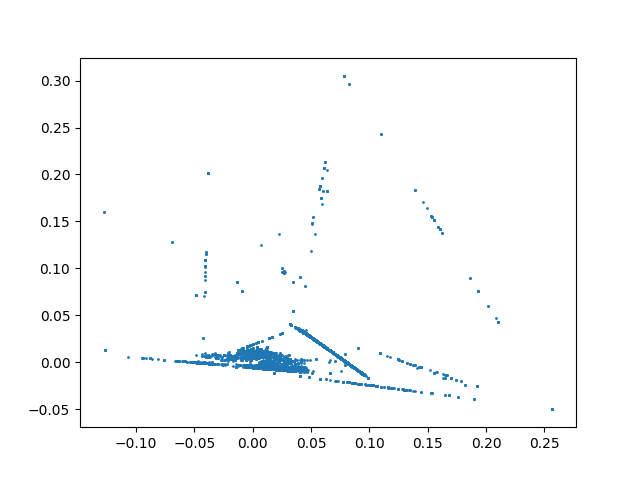

In [27]:
plt.figure()
plt.scatter(new[:,0], new[:,1], s=1)

In [ ]:
plt.figure(figsize=(5,15))
for i in range(k.dataFlat.shape[0]):
    curr = k.dataFlat[i]
    curr -= sub
    new = proj.transform(curr)
    
    plt.subplot(5,2, i+1)
    plt.scatter(new[:,0], new[:,1], s=.1)
    